In [1]:
import numpy as np
import scipy

from graspologic.inference import latent_position_test
from graspologic.embed import AdjacencySpectralEmbed, LaplacianSpectralEmbed
from graspologic.simulations import er_np, sbm, rdpg
from graspologic.utils import symmetrize
from graspologic.plot import heatmap, pairplot
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from sknetwork.data import erdos_renyi, painters, movie_actor
from sknetwork.embedding import Spectral, SVD
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from IPython.display import SVG
%matplotlib inline

<AxesSubplot:>

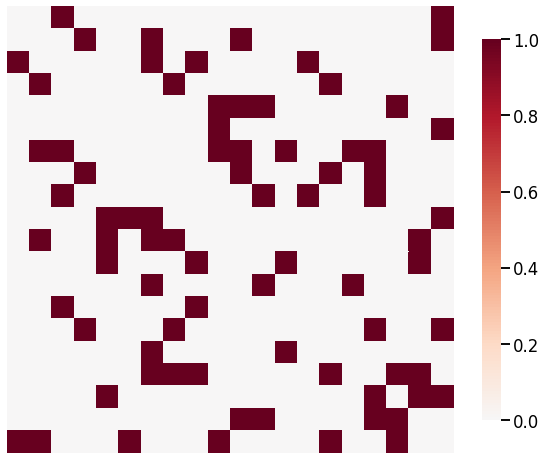

In [2]:
A = er_np(20, 0.2)
heatmap(A)
#B = scipy.sparse.csr_matrix(A)
#image = svg_graph(B)
#SVG(image)


In [3]:
ase = AdjacencySpectralEmbed(n_components=2)
X1 = ase.fit_transform(A)
spectral = Spectral(2)
X2 = spectral.fit_transform(A)
print(X1)
print(X2)

[[ 0.20682255 -0.07478155]
 [ 0.54119049 -0.02202748]
 [ 0.34952064  0.3527749 ]
 [ 0.35099168  0.15764349]
 [ 0.46549833 -0.56651024]
 [ 0.23390367 -0.10282597]
 [ 0.78950146 -0.65505606]
 [ 0.5161541  -0.41931349]
 [ 0.3767804  -0.45377092]
 [ 0.4712787   0.44139019]
 [ 0.65537421  0.6858454 ]
 [ 0.38558666  0.50624748]
 [ 0.31999764 -0.02021548]
 [ 0.16154441  0.03196834]
 [ 0.50223656 -0.06498605]
 [ 0.24677541  0.21374426]
 [ 0.75768701  0.59035495]
 [ 0.53163562  0.21590454]
 [ 0.53072897 -0.61214612]
 [ 0.58035023 -0.11652882]]
[[-0.51371469  0.85796108]
 [ 0.99608352  0.08841727]
 [-0.83835102  0.54513077]
 [ 0.89815288  0.43968329]
 [ 0.27155415 -0.96242316]
 [ 0.91007999  0.41443263]
 [-0.41908095 -0.90794887]
 [ 0.91913575  0.39394095]
 [-0.90434335  0.4268057 ]
 [ 0.91153057 -0.41123233]
 [ 0.79618913 -0.60504782]
 [-0.65842244 -0.75264859]
 [-0.42817414 -0.90369625]
 [-0.84169604  0.53995164]
 [ 0.83595412  0.54879933]
 [-0.38361977 -0.92349113]
 [ 0.73616933  0.6767974 ]


In [4]:
lse = LaplacianSpectralEmbed(n_components=2)
X1 = lse.fit_transform(A)
svd = SVD(2)
X2 = svd.fit_transform(A)
print(X1)
print(X2)

[[ 0.16012818 -0.05510154]
 [ 0.22645584 -0.09256669]
 [ 0.22645552  0.12190624]
 [ 0.19611621  0.11833841]
 [ 0.22645565 -0.32685007]
 [ 0.160128   -0.08885016]
 [ 0.29957246 -0.17086785]
 [ 0.22645537 -0.17791742]
 [ 0.22645539 -0.23794861]
 [ 0.22645544  0.19399025]
 [ 0.25318539  0.30894235]
 [ 0.2264553   0.35649143]
 [ 0.19611586 -0.16901929]
 [ 0.16012822  0.05433665]
 [ 0.22645501 -0.03904466]
 [ 0.16012801  0.15186373]
 [ 0.2773498   0.20016694]
 [ 0.22645526  0.16037484]
 [ 0.22645541 -0.31673568]
 [ 0.27734992 -0.00518452]]
[[ 0.43322308  0.13896259]
 [ 1.09916     0.0089635 ]
 [ 0.71397114 -0.68301409]
 [ 0.7315451  -0.28079453]
 [ 0.95777361  1.02947918]
 [ 0.48969665  0.18472315]
 [ 1.55746347  1.32123767]
 [ 1.05620709  0.78861184]
 [ 0.77411527  0.84836682]
 [ 0.9597107  -0.83433321]
 [ 1.32272602 -1.29358167]
 [ 0.7987095  -0.90800858]
 [ 0.65850549 -0.00455085]
 [ 0.34197812 -0.05000448]
 [ 1.02788433  0.13094434]
 [ 0.50925329 -0.39818053]
 [ 1.51383283 -1.16431699]


In [5]:
Y = np.linalg.norm(X1-X2, ord='fro')
print(Y)

5.328068515454542


[[0.36745865 0.75008627 0.7080294  0.14011647 0.52906178 0.33986025
  0.51005166 0.66169944 0.35625541 0.57801667 0.87424659 0.27734134
  0.6492594  0.20850352 0.1882934  0.9775306  0.72807987 0.89364078
  0.41472398 0.97073511]
 [0.25832717 0.62127165 0.21333205 0.70058815 0.88061793 0.48993342
  0.13620045 0.61312238 0.67429264 0.92466062 0.2420775  0.38594111
  0.11339571 0.15478899 0.29683459 0.75690178 0.52812739 0.80205888
  0.91564353 0.54862729]
 [0.49826982 0.10406298 0.53881851 0.23887738 0.46129591 0.81615539
  0.48195517 0.94898303 0.70245264 0.84808615 0.30828213 0.88323116
  0.95083504 0.56060598 0.62652618 0.59044538 0.34470259 0.55957306
  0.90147199 0.52932114]
 [0.21182595 0.26726645 0.54271363 0.81957813 0.10739456 0.74024156
  0.71159349 0.41420702 0.24104793 0.32929488 0.96782582 0.68637772
  0.64250108 0.81242765 0.18014885 0.9697026  0.4828728  0.94641402
  0.16688512 0.19140183]
 [0.85098535 0.61403246 0.75728283 0.19735056 0.53859462 0.71465129
  0.36930217 0.7

<AxesSubplot:>

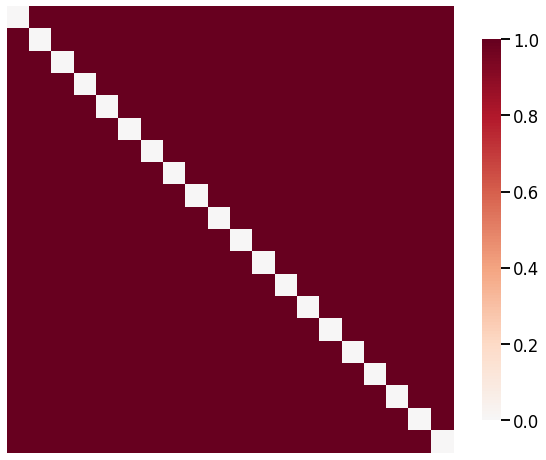

In [21]:
# Create a latent position matrix
X = np.random.uniform(low=0.1, high=1, size=(20, 20))
print(X)
A = rdpg(X)
print(A)
heatmap(A)

In [24]:
ase = AdjacencySpectralEmbed(n_components=19)
Y=ase.fit_transform(X)
print(Y)
print(np.linalg.norm((Y-X), ord='fro'))

(array([[ 0.76236751,  0.3756311 , -0.23266686,  0.15628137,  0.23773717,
         0.29757947,  0.04778318, -0.43283951,  0.23441992, -0.19429386,
         0.13854048, -0.02015209, -0.16837866,  0.33970169, -0.07364887,
        -0.03415562, -0.08666323, -0.10085804,  0.01296717],
       [ 0.66228675,  0.16431101, -0.00848849,  0.33185956,  0.67023063,
        -0.43964748,  0.18690951,  0.23629   ,  0.27174958,  0.19097601,
        -0.0627324 , -0.24752011, -0.09192469, -0.0902051 , -0.01214725,
         0.24040688,  0.11409312,  0.03059927, -0.07974559],
       [ 0.80127146, -0.30793636, -0.28825817, -0.12224408,  0.00512634,
        -0.45128902,  0.16898254,  0.00341387,  0.04150917,  0.27740025,
        -0.00186967,  0.31408306,  0.0834612 ,  0.00750853, -0.2562922 ,
        -0.23396063,  0.14807687, -0.20414716,  0.02511618],
       [ 0.68065801,  0.4369748 , -0.03507583, -0.44079681, -0.35135103,
         0.00641951, -0.30947866, -0.22428592,  0.22669185,  0.37091159,
         0.10

ValueError: operands could not be broadcast together with shapes (2,20,19) (20,20) 